<a href="https://colab.research.google.com/github/AleksandrMac/learning/blob/main/ai/hw/18_4_%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D1%8F%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

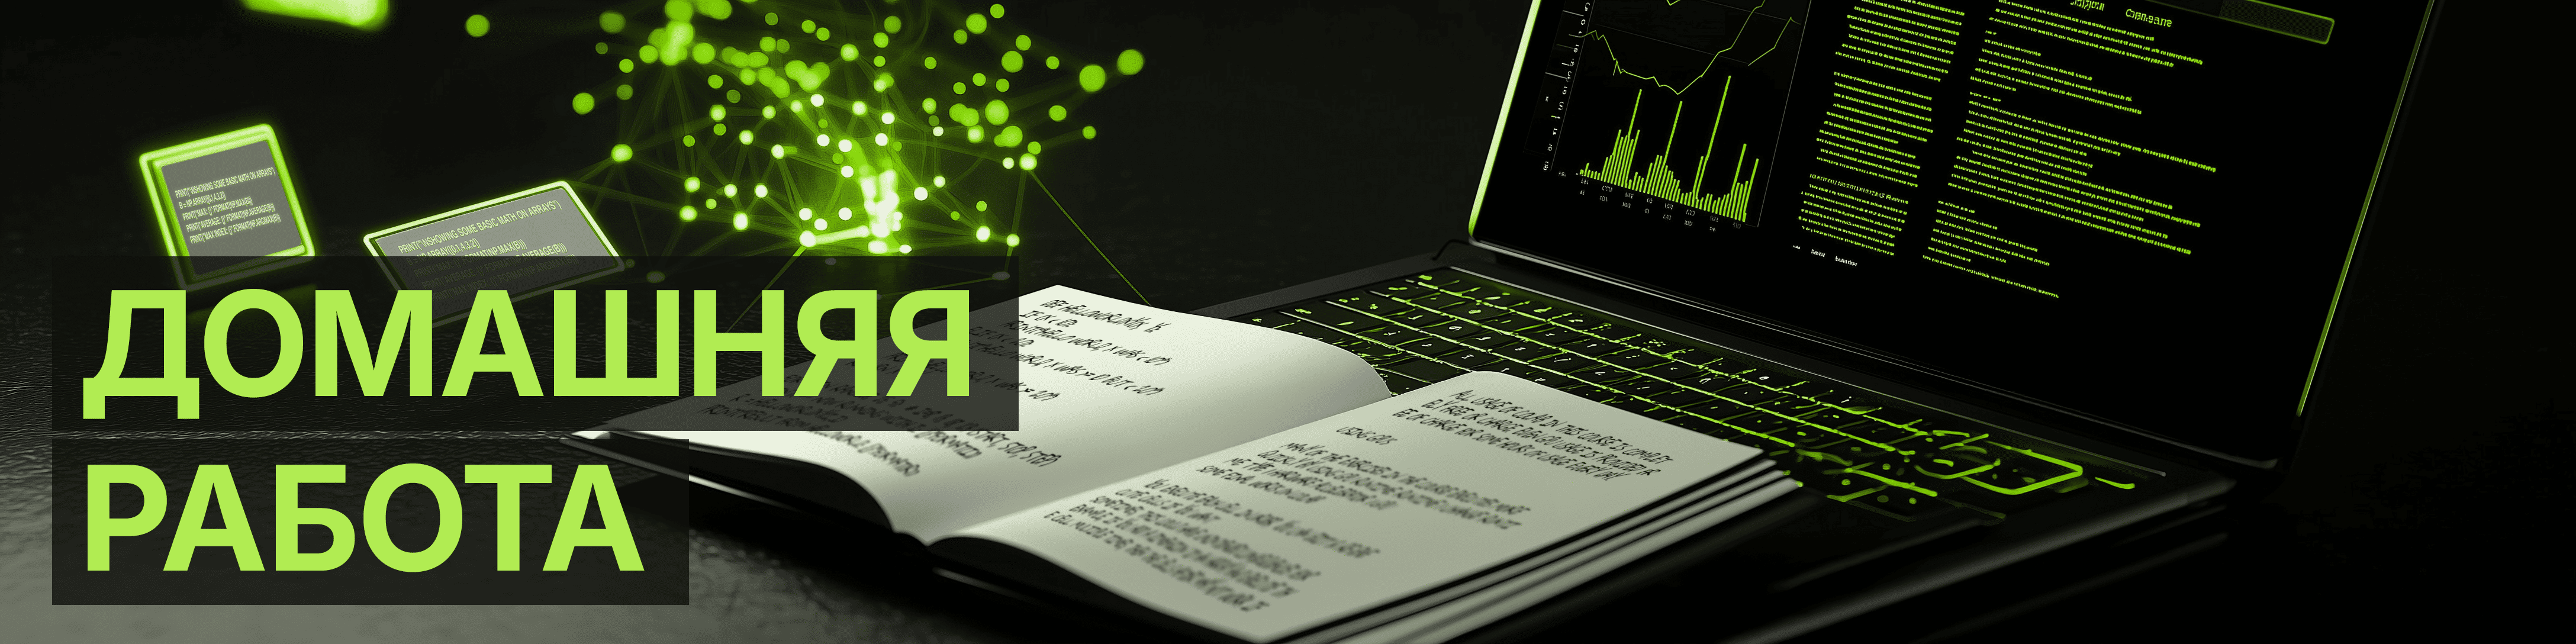

**Навигация по уроку**

1. [Введение в сверточные нейронные сети](https://colab.research.google.com/drive/10cBnEfHhZlv3ZhEgVimA3GqSEZtvqpTv)
2. [Обучение сверточной нейронной сети на ограниченном наборе данных](https://colab.research.google.com/drive/1e1aZ9K1vQIujPf1mzmta5xtbfNqJ_ai-)
3. [Предобученные сверточные НС](https://colab.research.google.com/drive/12VehrJe062P9QImtvjILQG0DOLooiyk0)
4. Домашняя работа

В данном домашнем задании вам необходимо:

1. Используйте датасет "Собаки и кошки", рассмотренный в данном уроке. Причем используйте его целиком, а не только 4000 изображений.
2. Проведите аугментацию изображений.
3. В качестве предобученной модели возьмите `MobileNet`
4. Создайте модель, приведенную ниже.
5. Обучите модель и проверьте на тестовой выборке.
6. Если модель не обеспечивает заданную точность - "поиграйтесь" с гиперпараметрами.


Для получения 3 баллов за задание необходимо достичь на контрольной выборке точности 90%, 4 баллов -  более 93%, 5 баллов - более 95%.

На 20 тыс. изображений данная модель выдавала нам результат 99%.

**Подсказка**. Обратите внимание, что предлагаемая модель уже не является бинарной классификацией. Это уже задача многоклассовой классификации (в нашем случае 2 класса). А значит в генераторах изображений необходимо использовать:

```pyton
class_mode='categorical'
```

Также необходимо вспомнить какую функцию ошибки использовать с задачей многоклассовой классификации. Можно попробовать в качестве оптимизатора использовать Adam с разными шагами.

Также обратите внимание, что вместо слоя `Flatten()`, вам предлагается использовать `GlobalAveragePooling2D()` (https://keras.io/api/layers/pooling_layers/global_average_pooling2d/).


In [22]:
from keras.layers import Input
from keras.models import Model, Sequential


In [49]:
from keras.applications import MobileNet
from keras import models
from keras.layers import GlobalAveragePooling2D, Dense, Dropout
from keras import optimizers

width, height = 224, 224

conv_base = MobileNet(
    weights='imagenet',
    include_top=False,
    input_shape=(width, height, 3)
)
conv_base.trainable = False

def model_maker(IMG_WIDTH, IMG_HEIGHT, NUM_CLASSES):
    base_model = MobileNet(include_top=False, input_shape = (IMG_WIDTH, IMG_HEIGHT, 3))

    for layer in base_model.layers[:]:
        layer.trainable = False

    input = Input(shape=(IMG_WIDTH, IMG_WIDTH, 3))
    custom_model = base_model(input)
    custom_model = GlobalAveragePooling2D()(custom_model)
    custom_model = Dense(64, activation='relu')(custom_model)
    custom_model = Dropout(0.5)(custom_model)
    predictions = Dense(NUM_CLASSES, activation='softmax')(custom_model)

    return Model(inputs=input, outputs=predictions)

def model_maker_exfeat():
    return Sequential([
        GlobalAveragePooling2D(input_shape=(7,7,1024,)),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(CLASS_COUNT, activation='softmax')  # Для categorical_crossentropy
    ])


In [53]:
conv_base.summary()

Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_46 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,228,864 (12.32 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 3,228,864 (12.32 MB)

In [5]:
# Ваше решение
!wget https://storage.yandexcloud.net/academy.ai/cat-and-dog.zip
# Разархивируем датасета во временную папку 'temp'
!unzip -qo "cat-and-dog" -d ./temp

--2025-12-01 05:40:46--  https://storage.yandexcloud.net/academy.ai/cat-and-dog.zip
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228082266 (218M) [application/x-zip-compressed]
Saving to: ‘cat-and-dog.zip’

cat-and-dog.zip     100%[===================>] 217.52M  9.48MB/s    in 25s     

2025-12-01 05:41:13 (8.54 MB/s) - ‘cat-and-dog.zip’ saved [228082266/228082266]



In [6]:
# @title Загрузка набора данных и обучение модели

import os

# Набор утилит для работы с файловой системой
import shutil
from keras import layers # импортируем слои
from keras import models # импортируем модели
from keras import optimizers  # импортируем функции оптимизации
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Папка с папками картинок, рассортированных по категориям
IMAGE_PATH = './temp/training_set/training_set/'

# Папка в которой будем создавать выборки
BASE_DIR = './dataset/'

# Определение списка имен классов
CLASS_LIST = sorted(os.listdir(IMAGE_PATH))

# Определение количества классов
CLASS_COUNT = len(CLASS_LIST)

# При повторном запуске пересоздаим структуру каталогов
# Если папка существует, то удаляем ее со всеми вложенными каталогами и файлами
if os.path.exists(BASE_DIR):
    shutil.rmtree(BASE_DIR)

# Создаем папку по пути BASE_DIR
os.mkdir(BASE_DIR)

# Сцепляем путь до папки с именем вложенной папки. Аналогично BASE_DIR + '/train'
train_dir = os.path.join(BASE_DIR, 'train')

# Создаем подпапку, используя путь
os.mkdir(train_dir)

# Сцепляем путь до папки с именем вложенной папки. Аналогично BASE_DIR + '/validation'
validation_dir = os.path.join(BASE_DIR, 'validation')

# Создаем подпапку, используя путь
os.mkdir(validation_dir)

# Сцепляем путь до папки с именем вложенной папки. Аналогично BASE_DIR + '/test'
test_dir = os.path.join(BASE_DIR, 'test')

# Создаем подпапку, используя путь
os.mkdir(test_dir)

# Функция создания подвыборок (папок с файлами)
def create_dataset(
    img_path: str,         # Путь к файлам с изображениями классов
    new_path: str,         # Путь к папке с выборками
    class_name: str,       # Имя класса (оно же и имя папки)
    start_index: int,      # Стартовый индекс изображения, с которого начинаем подвыборку
    end_index: int         # Конечный индекс изображения, до которого создаем подвыборку

):

    src_path = os.path.join(img_path, class_name)  # Полный путь к папке с изображениями класса
    dst_path = os.path.join(new_path, class_name)  # Полный путь к папке с новым датасетом класса

    # Получение списка имен файлов с изображениями текущего класса
    class_files = os.listdir(src_path)

    # Создаем подпапку, используя путь
    os.mkdir(dst_path)

    # Перебираем элементы, отобранного списка с начального по конечный индекс
    for fname in class_files[start_index : end_index]:
        # Путь к файлу (источник)
        src = os.path.join(src_path, fname)
        # Новый путь расположения файла (назначение)
        dst = os.path.join(dst_path, fname)
        # Копируем файл из источника в новое место (назначение)
        shutil.copyfile(src, dst)


for class_label in range(CLASS_COUNT):    # Перебор по всем классам по порядку номеров (их меток)
    class_name = CLASS_LIST[class_label]  # Выборка имени класса из списка имен

    image_count = len(os.listdir(os.path.join(IMAGE_PATH, class_name)))
    image_count_50 = int(image_count*0.5)
    image_count_75 = int(image_count*0.75)

    # Создаем обучающую выборку для заданного класса
    create_dataset(IMAGE_PATH, train_dir, class_name, 0, image_count_50)
    # Создаем проверочную выборку для заданного класса
    create_dataset(IMAGE_PATH, validation_dir, class_name, image_count_50, image_count_75)
    # Создаем тестовую выборку для заданного класса
    create_dataset(IMAGE_PATH, test_dir, class_name, image_count_75, image_count)

In [54]:
import os                                                 # Для работы с файловой системой
import numpy as np                                        # Работа с матрицами
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Импортируем генератор изображений

datagen = ImageDataGenerator(rescale=1./255) # Задаем генератор и нормализуем данные делением на 255
batch_size = 20 # Размер батча (20 изображений)


# Функция извлечения признаков
def extract_features(directory, sample_count):
    # определяем размерность признаков, заполняем нулями
    features = np.zeros(shape=(sample_count, 7, 7, 1024))
    # определяем размерность выходных меток, заполняем нулями
    labels = np.zeros(shape=(sample_count, CLASS_COUNT))

    # генерируем данные из папки
    generator = datagen.flow_from_directory(
        directory,                # путь к папке
        target_size=(224, 224),   # изменить картинки до размера 224 х 224
        batch_size=batch_size,    # размер пакета
        class_mode='categorical'       # задача классификации
    )
    i = 0
    for inputs_batch, labels_batch in generator: # в цикле пошагово генерируем пакет с картинками и пакет из меток
        features_batch = conv_base.predict(inputs_batch, verbose=0) # делаем предсказание на сгенерируемом пакете
        features[i * batch_size : (i + 1) * batch_size] = features_batch # складываем пакеты с признаками пачками в массив с признаками

        labels[i * batch_size : (i + 1) * batch_size] = labels_batch     # складываем пакеты с метками в массив с метками
        i += 1

        if i * batch_size >= sample_count: # Прерываем генерацию, когда выходим за число желаемых примеров
            break

    return features, labels # возвращаем кортеж (признаки, метки)

# Извлекаем (признаки, метки) для обучающей выборки, 4000 образцов
train_features, train_labels = extract_features(train_dir, 4000)

# Извлекаем (признаки, метки) для проверочной выборки, 2000 образцов
validation_features, validation_labels = extract_features(validation_dir, 2000)

# Извлекаем (признаки, метки) для тестовой выборки, 2000 образцов
test_features, test_labels = extract_features(test_dir, 2000)

Found 4002 images belonging to 2 classes.
Found 2001 images belonging to 2 classes.
Found 2002 images belonging to 2 classes.


In [55]:
from keras import models
from keras import layers
from keras import optimizers

model_exfeat = model_maker_exfeat()
model_exfeat.summary()


model_exfeat.compile(
    optimizer=optimizers.RMSprop(learning_rate=2e-5),
    loss='categorical_crossentropy',
    metrics=['acc']
)


# Обучаем модель на извлеченных признаках
history_exfeat = model_exfeat.fit(
    train_features, train_labels,
    epochs=30,
    batch_size=20,
    validation_data=(validation_features, validation_labels)
)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ global_average_pooling2d_15     │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65,730 (256.76 KB)

 Trainable params: 65,730 (256.76 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - acc: 0.5729 - loss: 0.8264 - val_acc: 0.9150 - val_loss: 0.3254
Epoch 2/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.8442 - loss: 0.3661 - val_acc: 0.9520 - val_loss: 0.1817
Epoch 3/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.9117 - loss: 0.2384 - val_acc: 0.9655 - val_loss: 0.1279
Epoch 4/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.9277 - loss: 0.1990 - val_acc: 0.9680 - val_loss: 0.1037
Epoch 5/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.9505 - loss: 0.1524 - val_acc: 0.9705 - val_loss: 0.0886
Epoch 6/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.9513 - loss: 0.1325 - val_acc: 0.9720 - val_loss: 0.0813
Epoch 7/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.9640 - loss: 0.1093 - val_acc: 0.9745 - val_loss: 0.0752
Epoch 8/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.9725 - loss: 0.0865 - val_acc: 0.9735 - val_loss: 0.0718
Epoch 9/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - a

In [26]:
import matplotlib.pyplot as plt

# Рисуем графики
def show_history(store):
    acc = store.history['acc']
    val_acc = store.history['val_acc']
    loss = store.history['loss']
    val_loss = store.history['val_loss']
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, 'r', label='Точность на обучающей выборке')
    plt.plot(epochs, val_acc, 'bo', label='Точность на проверочной выборке')
    plt.title('График точности на проверочной и обучающей выборках')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, 'r', label='Потери на обучающей выборке')
    plt.plot(epochs, val_loss, 'bo', label='Потери на проверочной выборке')
    plt.title('График потерь на проверочной и обучающей выборках')
    plt.legend()
    plt.show()

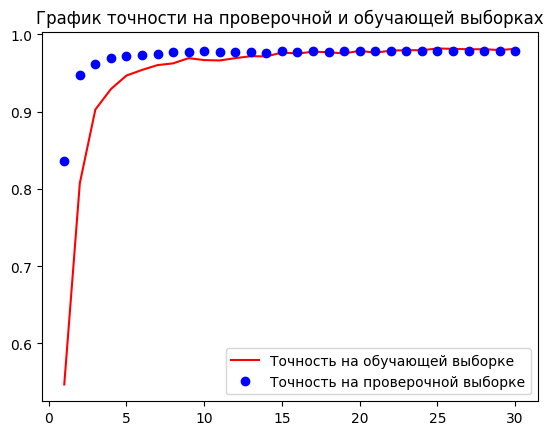

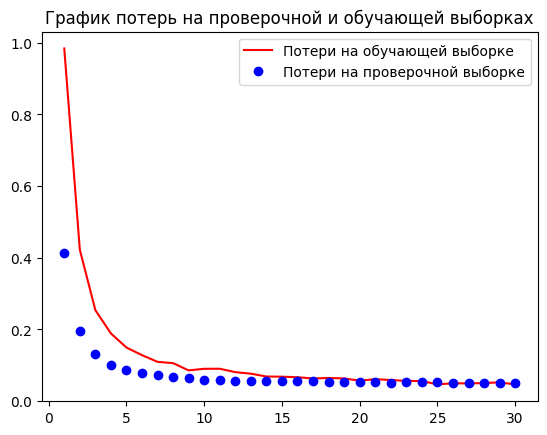

In [51]:
show_history(history_exfeat)

In [44]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

# генератор для обучающей выборки
train_datagen = ImageDataGenerator(
    rescale=1./255,           # нормализация данных
    rotation_range=40,        # поворот 40 градусов
    width_shift_range=0.2,    # смещенние изображения по горизонтали
    height_shift_range=0.2,   # смещенние изображения по вертикали
    shear_range=0.2,          # случайный сдвиг
    zoom_range=0.2,           # случайное масштабирование
    horizontal_flip=True,     # отражение по горизонтали
    fill_mode='nearest'       # стратегия заполнения пустых пикселей при трансформации
)
# генератор для проверочной выборки
test_datagen = ImageDataGenerator(rescale=1./255)

# генерация картинок из папки для обучающей выборки
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(width, height),
    batch_size=20,
    class_mode='categorical'
)

# генерация картинок из папки для проверочной выборки
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(width, height),
    batch_size=20,
    class_mode='categorical'
)

model = model_maker(width,height,2)
model.summary()


model.compile(
    optimizer=optimizers.RMSprop(),#learning_rate=2e-5),
    loss='categorical_crossentropy',
    metrics=['acc']
)

# обучаем модель
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
)


Found 4002 images belonging to 2 classes.
Found 2001 images belonging to 2 classes.


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_42 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenet_1.00_224 (Functional) │ (None, 7, 7, 1024)     │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_12     │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,294,594 (12.57 MB)

 Trainable params: 65,730 (256.76 KB)

 Non-trainable params: 3,228,864 (12.32 MB)

Epoch 1/30
201/201 ━━━━━━━━━━━━━━━━━━━━ 64s 291ms/step - acc: 0.8718 - loss: 0.3304 - val_acc: 0.9755 - val_loss: 0.0823
Epoch 2/30
201/201 ━━━━━━━━━━━━━━━━━━━━ 53s 261ms/step - acc: 0.9552 - loss: 0.1196 - val_acc: 0.9755 - val_loss: 0.0682
Epoch 3/30
201/201 ━━━━━━━━━━━━━━━━━━━━ 51s 254ms/step - acc: 0.9566 - loss: 0.1108 - val_acc: 0.9790 - val_loss: 0.0876
Epoch 4/30
201/201 ━━━━━━━━━━━━━━━━━━━━ 51s 254ms/step - acc: 0.9623 - loss: 0.1044 - val_acc: 0.9750 - val_loss: 0.0676
Epoch 5/30
201/201 ━━━━━━━━━━━━━━━━━━━━ 52s 260ms/step - acc: 0.9700 - loss: 0.0874 - val_acc: 0.9795 - val_loss: 0.0728
Epoch 6/30
201/201 ━━━━━━━━━━━━━━━━━━━━ 51s 253ms/step - acc: 0.9643 - loss: 0.0936 - val_acc: 0.9795 - val_loss: 0.0633
Epoch 7/30
201/201 ━━━━━━━━━━━━━━━━━━━━ 53s 263ms/step - acc: 0.9687 - loss: 0.0857 - val_acc: 0.9815 - val_loss: 0.0698
Epoch 8/30
201/201 ━━━━━━━━━━━━━━━━━━━━ 51s 254ms/step - acc: 0.9651 - loss: 0.1028 - val_acc: 0.9795 - val_loss: 0.0686
Epoch 9/30
201/201 ━━━━━━━━━━━━━

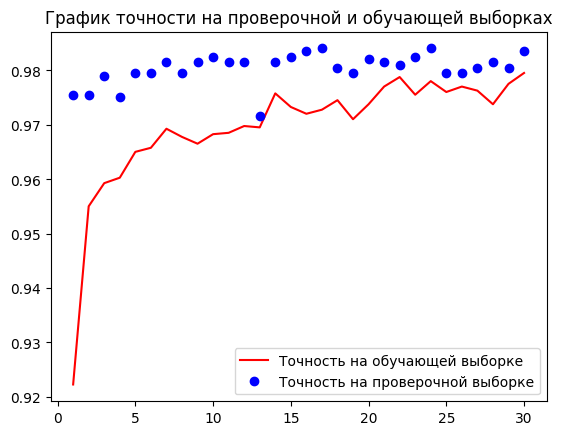

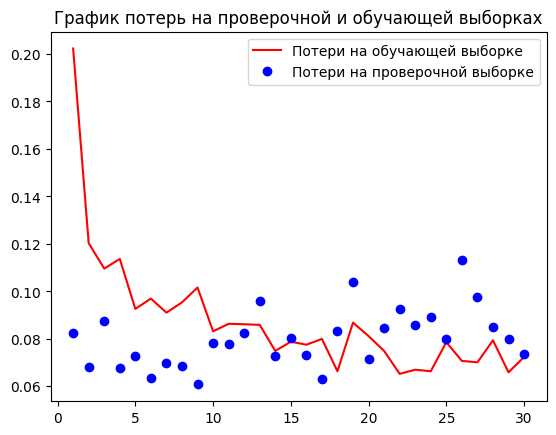

In [45]:
show_history(history)

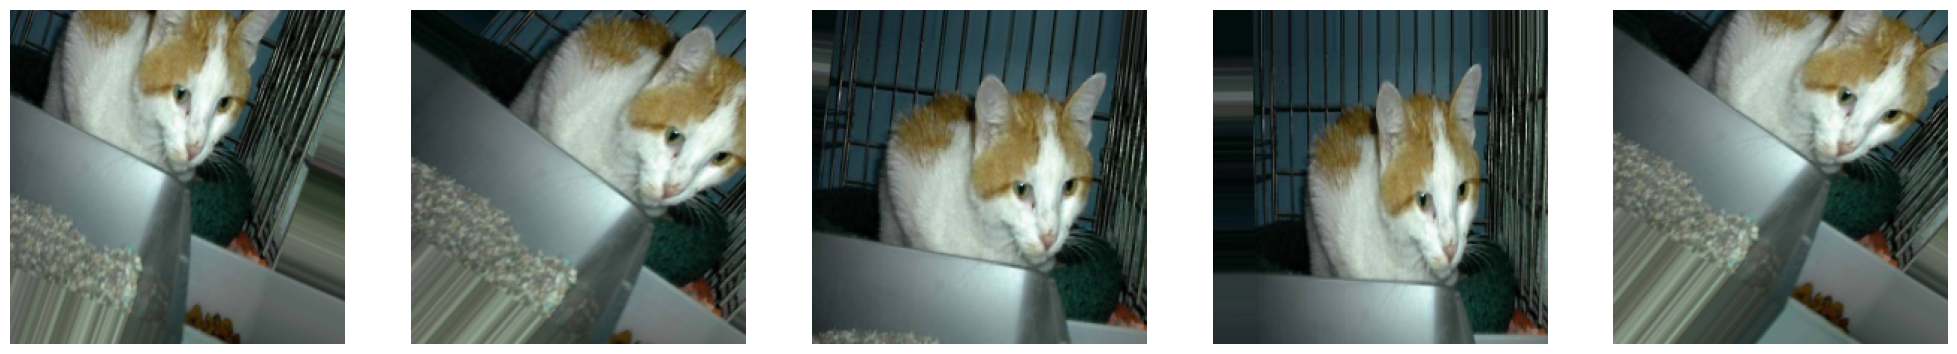

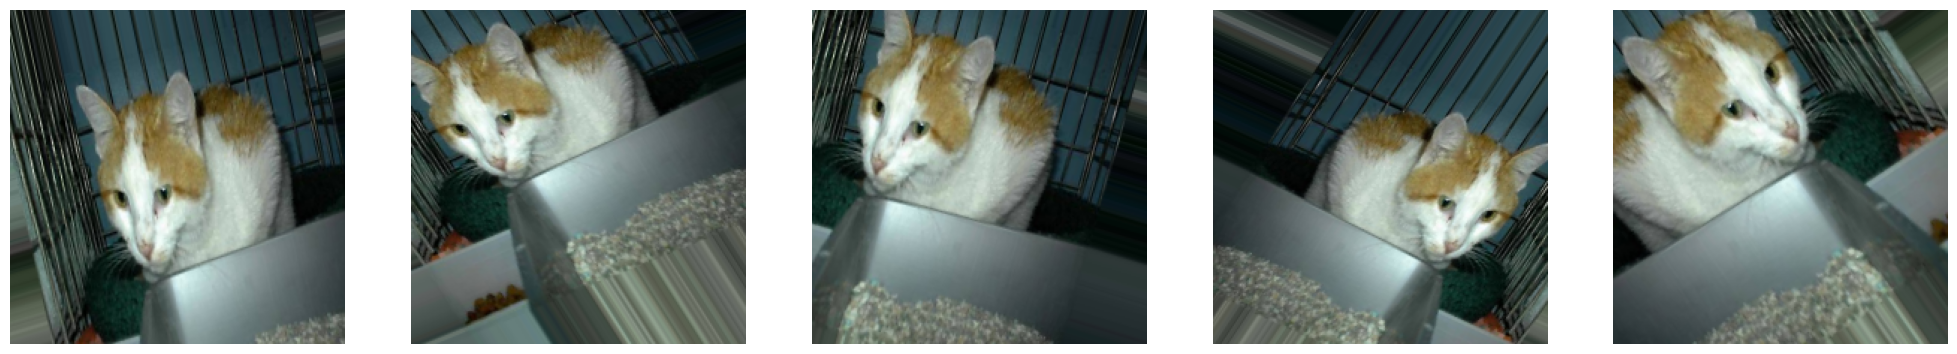

In [61]:
from keras.preprocessing import image # для работы с изображениями

img = validation_generator[0][0][4]   # выводим случайную картинку с помощью генератора (первый индекс - картинка или метка, второй - номер пакета, третий - номер изображения в пакете)
x = image.img_to_array(img)           # преобразования изображений в матрицу NumPy
x = x.reshape((1,) + x.shape)         # изменяем форму картинки, так как flow работет с массивами изображений, то указываем, что картинка будет одна
columns = 5                           # в сколько колонок выводить данные

i = 0
for batch in train_datagen.flow(x, batch_size=1):  # запускаем генерацию их массива изображений, пока не встретиться в цикле break
    ix = i % columns # Отображаем по 5 (или другое число, заданное columns) в строку
    # Остаток от деления на 5 равный нулю говорит, что пора перейти на следующую строку (новый график)
    if ix == 0:
        fig, ax = plt.subplots(1, columns, figsize=(25, 8)) # Область построения графика: одна строка в 5 колонок

    ax[ix].imshow(image.array_to_img(batch[0])) # Отображаем изображение животного на графике
    ax[ix].axis('off') # Отключаем отображение осей на графике

    i += 1
    if i % 10 == 0: # если сгенерировали 10 картинок, то можно прервать генерацию
        break
plt.show()

при использовании модели MobileNet в задаче многоклассовой классификации, дает отличный результат в базовых настройках. подход выделения признаков, дает оптимальные результаты в 98 %, при небольших затратах. Подход с расширением данных, в свою очередь, на более длинной дистанции обучения, может выдать более точную высокие показатели точности.